# Underfitting vs. Overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [2]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

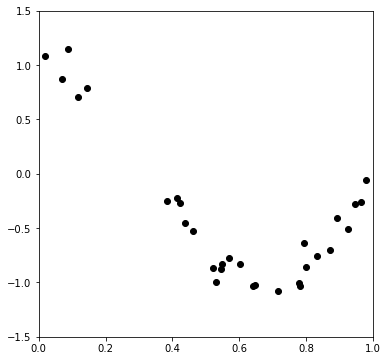

In [3]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

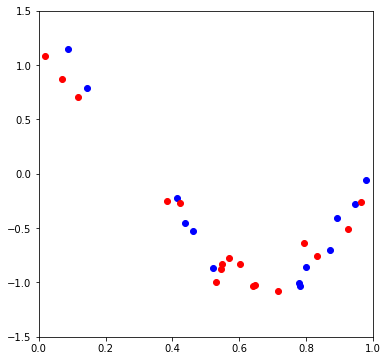

In [4]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics

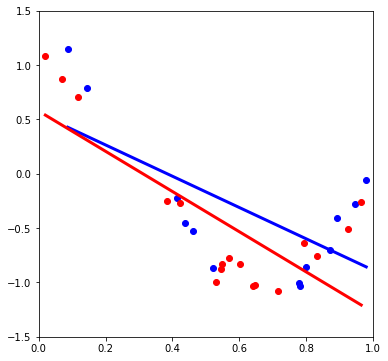

In [33]:
X1 = np.vstack(X1)
X2 = np.vstack(X2)
model1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
model1.fit(X1,y1)

model2 = make_pipeline(PolynomialFeatures(1), LinearRegression())
model2.fit(X2,y2)

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.plot(X1, model1.predict(X1), color='blue',linewidth=3)
plt.plot(X2, model2.predict(X2), color='red',linewidth=3)
plt.show()



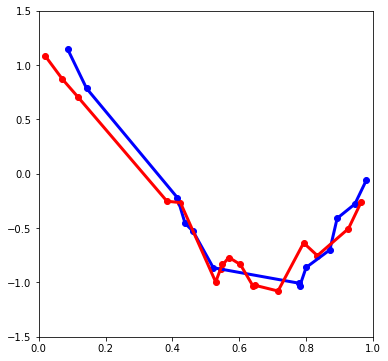

In [35]:
model1 = make_pipeline(PolynomialFeatures(20), LinearRegression())
model1.fit(X1,y1)

model2 = make_pipeline(PolynomialFeatures(20), LinearRegression())
model2.fit(X2,y2)

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
plt.plot(X1, model1.predict(X1), color='blue',linewidth=3)
plt.plot(X2, model2.predict(X2), color='red',linewidth=3)
plt.show()

# Zadanie
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.


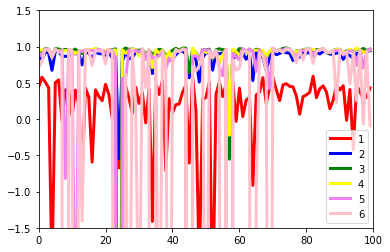

In [8]:
from sklearn.metrics import r2_score

np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
values = { 1:[],2:[],3:[],4:[],5:[],6:[] }

for i in range(100):
    s=np.random.random_sample(n_samples)
    s[s>0.5]=1
    s[s<=0.5]=0
    X1=X[s==1]
    y1=y[s==1]
    X2=X[s==0]
    y2=y[s==0]
    X1 = np.vstack(X1)
    X2 = np.vstack(X2)
    for j in range(1,7):
        model3 = make_pipeline(PolynomialFeatures(j), LinearRegression())
        model3.fit(X1,y1)
        values[j].append(r2_score(y2,model3.predict(X2)))

fig, ax = plt.subplots()
colors = ['red','blue','green','yellow','violet','pink']
for i in range (1,7):
    axes = plt.gca()
    axes.set_xlim([0,100])
    axes.set_ylim([-1.5,1.5])
    ax.plot(np.arange(100),values[i] , color=colors[i-1],linewidth=3,label=i)

plt.legend()
plt.show()